In [1]:
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import batman
import emcee
import wget
import kplr
import os
from astropy.io import fits

import astropy.units as u
from astropy.constants import G

% matplotlib inline

In [67]:
koiNumber = 2.01

client = kplr.API()
# Find the target KOI.
koi = client.koi(koiNumber)
period=koi.koi_period
KIC=koi.kepid

KICname = str(KIC).zfill(9)
KICshort=KICname[0:4]

#folder to hold the downloaded light curves
dataDirectory = os.getcwd()+"/downloadedData/K{0}".format(str(koiNumber).zfill(8))

if not os.path.exists(dataDirectory):
    os.makedirs(dataDirectory)

ftpfolder='http://archive.stsci.edu/pub/kepler/lightcurves//'+KICshort+'/'+KICname+'/'
print ftpfolder

fileList = wget.download(ftpfolder)

with open(fileList, 'r') as listOfLinks:
    lol=listOfLinks.read()

lol = lol.split('href="kplr')[1:-2]

fileNames = []

for linkString in lol:
    linkString = linkString.split('">')[1]
    linkString = linkString.split('<')[0]
    fileNames.append(linkString)

#list to hold names of long cadence light curve fits files
lcs = []
for fileToDownload in fileNames:
    targetFile = ftpfolder+fileToDownload
    print targetFile
    lcName = dataDirectory+'/'+fileToDownload
    #download fits file if necessary
    if not os.path.exists(lcName):
        wget.download(targetFile, lcName)
    
    #only long-cadence files get added to our light curve list
    #if lcName[-8:] == "llc.fits":
    #    lcs.append(fileToDownload)
    
    #if lcName[-8:] == "slc.fits":
    #    lcs.append(fileToDownload)
    
    lcs.append(fileToDownload)
        
#delete download list
os.system('rm ./download.wget')

http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009131105131_llc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009131110544_slc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009166043257_llc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009166044711_slc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009201121230_slc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009231120729_slc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009259160929_llc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009259162342_slc.fits
http://archive.stsci.edu/pub/kepler/lightcurves//0106/010666592/kplr010666592-2009291181958_slc.fits
http://archive.stsci.edu/p

0

In [68]:
#sort light curve fits files by date
dates = []
for lc in lcs:
    dates.append(int(lc[14:-9]))

dates = np.array(dates)
dateIdxs = np.argsort(dates)

lcs = np.array(lcs)[dateIdxs]

print lcs

['kplr010666592-2009131105131_llc.fits'
 'kplr010666592-2009131110544_slc.fits'
 'kplr010666592-2009166043257_llc.fits'
 'kplr010666592-2009166044711_slc.fits'
 'kplr010666592-2009201121230_slc.fits'
 'kplr010666592-2009231120729_slc.fits'
 'kplr010666592-2009259160929_llc.fits'
 'kplr010666592-2009259162342_slc.fits'
 'kplr010666592-2009291181958_slc.fits'
 'kplr010666592-2009322144938_slc.fits'
 'kplr010666592-2009350155506_llc.fits'
 'kplr010666592-2009350160919_slc.fits'
 'kplr010666592-2010019161129_slc.fits'
 'kplr010666592-2010049094358_slc.fits'
 'kplr010666592-2010078095331_llc.fits'
 'kplr010666592-2010078100744_slc.fits'
 'kplr010666592-2010111051353_slc.fits'
 'kplr010666592-2010140023957_slc.fits'
 'kplr010666592-2010174085026_llc.fits'
 'kplr010666592-2010174090439_slc.fits'
 'kplr010666592-2010203174610_slc.fits'
 'kplr010666592-2010234115140_slc.fits'
 'kplr010666592-2010265121752_llc.fits'
 'kplr010666592-2010265121752_slc.fits'
 'kplr010666592-2010296114515_slc.fits'


In [69]:
# Loop over the datasets and read in the data.
time, flux, ferr, quality = [], [], [], []
print(len(lcs),' lightcurves')
for lc in lcs:
    f = fits.open(dataDirectory+'/'+lc)
    #print f[1]
    # The lightcurve data are in the first FITS HDU.
    hdu_data = f[1].data
    print np.shape(hdu_data["time"])
    time.append(hdu_data["time"])
    flux.append(hdu_data["sap_flux"])
    ferr.append(hdu_data["sap_flux_err"])
    quality.append(hdu_data["sap_quality"])

print type(time)
print type(time[0])
print len(time[0])
print len(time)

print(len(time),' observing periods')
print('period: ',period)
firstObs=0
lastObs=len(time)-1

(67, ' lightcurves')
(476,)
(14280,)
(1639,)
(49170,)
(45210,)
(44010,)
(4354,)
(39810,)
(44550,)
(44100,)
(4370,)
(38160,)
(45600,)
(42480,)
(4397,)
(42450,)
(46290,)
(40560,)
(4634,)
(49290,)
(39780,)
(45390,)
(4398,)
(44220,)
(44220,)
(42870,)
(4375,)
(41760,)
(25980,)
(42720,)
(3279,)
(29490,)
(53460,)
(41850,)
(4768,)
(45780,)
(44220,)
(46170,)
(4573,)
(44340,)
(45630,)
(44340,)
(50250,)
(4754,)
(38910,)
(40200,)
(4044,)
(39840,)
(47370,)
(42930,)
(39990,)
(4421,)
(45330,)
(44280,)
(4757,)
(50160,)
(45270,)
(44220,)
(4780,)
(51270,)
(7680,)
(53310,)
(4203,)
(46770,)
(32850,)
(1556,)
(6180,)
<type 'list'>
<type 'numpy.ndarray'>
476
67
(67, ' observing periods')
('period: ', 2.204735417)


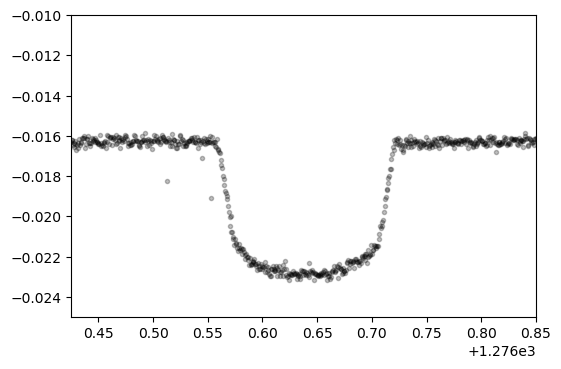

In [77]:
firstPlot=plt.gca()
firstPlot.plot(np.hstack(time[firstObs:lastObs+1]),(np.hstack(flux[firstObs:lastObs+1])/np.nanmean(np.hstack(flux[firstObs:lastObs+1])))-1,'k.',alpha=0.25)
plt.xlim(1276.425,1276.85)
plt.ylim(-0.025,-0.01)
plt.show()